<a href="https://colab.research.google.com/github/prashantiyaramareddy/AI-ML-Learnings/blob/master/ComputerVision/Linear_NN_for_images.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Shallow Neural Network implementation

In [1]:
!pip install tensorflow

In [4]:
import tensorflow as tf
IMG_HEIGHT = 224
IMG_WIDTH = 224
IMG_CHANNELS = 3

CLASS_NAMES = ['daisy', 'dandelion', 'roses', 'sunflowers', 'tulips']

# Function to read CSV FILE

In [5]:
def readanddecode(filename, resize_dims):
  # 1. Read the raw file
  img_bytes = tf.io.read_file(filename)

  # 2. Convert to tensor
  img_tensor = tf.io.decode_jpeg(img_bytes, channels=IMG_CHANNELS)

  # 3. Convert pixels to floats
  img_tensor = tf.image.convert_image_dtype(img_tensor, tf.float32)

  # 4. Resize the image
  img = tf.image.resize(img_tensor, resize_dims)

  return img


In [8]:
from os import read
def parse_csvline(csv_line):
  # record defaults specify the datatypes for each column
  record_default = ["", ""]
  filename, label_string = tf.io.decode_csv(csv_line, record_default)

  # Load the image
  img = readanddecode(filename,[IMG_HEIGHT, IMG_WIDTH])

  # Convert the label string to integer based on the CLASSNAMES index
  label = tf.argmax(tf.math.equal(CLASS_NAMES, label_string))

  return img, label

  return img, label

In [13]:
# Define Datasets
train_dataset = tf.data.TextLineDataset("gs://cloud-ml-data/img/flower_photos/train_set.csv").map(parse_csvline,num_parallel_calls=tf.data.AUTOTUNE).batch(16).prefetch(tf.data.AUTOTUNE)

eval_dataset = tf.data.TextLineDataset("gs://cloud-ml-data/img/flower_photos/eval_set.csv").map(parse_csvline,num_parallel_calls=tf.data.AUTOTUNE).batch(16).prefetch(tf.data.AUTOTUNE)

In [12]:
for image_batch, label_batch in train_dataset.take(3):
  print("Image batch shape",image_batch.shape)
  print("Label Batch Shape", label_batch.shape)
  print("Labels", label_batch.numpy())

Image batch shape (16, 224, 224, 3)
Label Batch Shape (16,)
Labels [0 1 1 1 0 2 1 0 4 3 0 3 1 4 4 1]
Image batch shape (16, 224, 224, 3)
Label Batch Shape (16,)
Labels [0 3 2 1 0 4 2 0 2 2 1 3 3 2 1 0]
Image batch shape (16, 224, 224, 3)
Label Batch Shape (16,)
Labels [3 1 1 1 1 0 1 2 4 3 3 2 0 1 4 0]


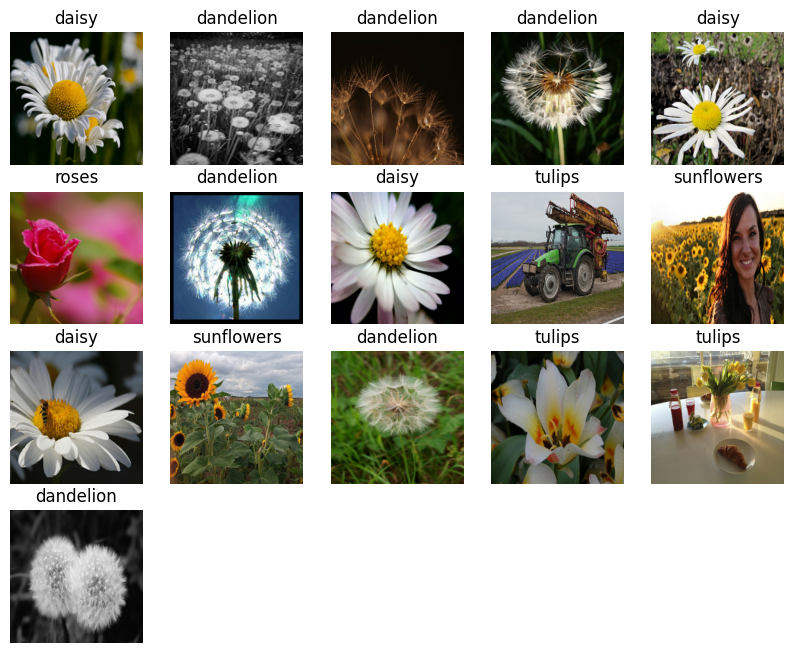

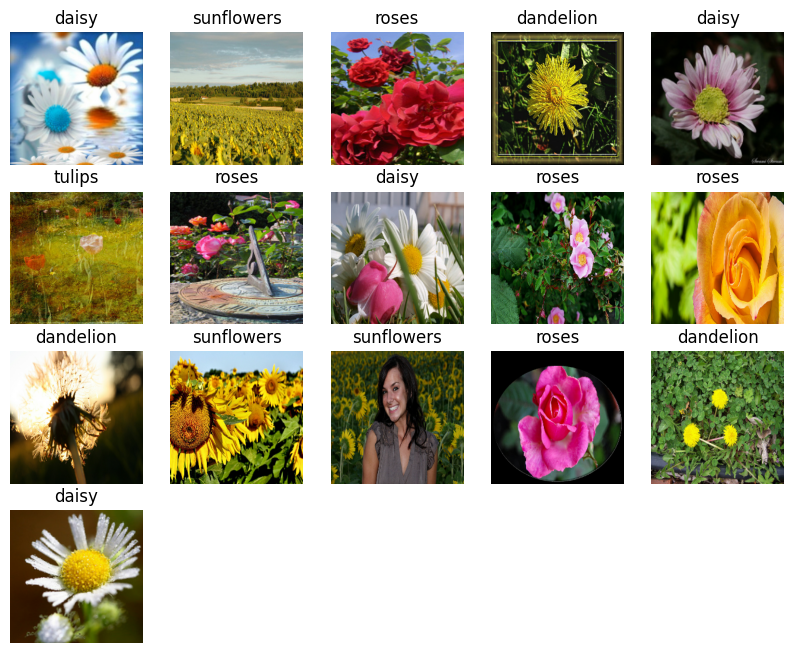

In [15]:
import matplotlib.pyplot as plt

for image_batch, label_batch in train_dataset.take(2):
  plt.figure(figsize=(10,10))
  for n in range(image_batch.shape[0]): # Iterate up to the actual batch size
    ax = plt.subplot(5,5,n+1)
    plt.imshow(image_batch[n])
    plt.title(CLASS_NAMES[label_batch[n]])
    plt.axis("off")

  plt.show()